# 1.

### 아래 코드 실행해주세요

In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve

In [2]:
review_df = pd.read_csv('labeledTrainData.tsv', header=0, sep="\t", quoting=3)

### 1.1< 함수 작성>(15점)
1. <br \> html 태그는 replace 함수로 공백 변환
2. 영어로 된 문자열만 추출
3. train과 label을 30%의 비율로 반환(test_size = 0.3)
4. X_train, X_test, y_train, y_test를 모두 반환하는 함수를 작성
5. 함수 이름은 data로 작성해주세요

In [3]:
def data(df):
    df['review'] = df['review'].str.replace('<br />', ' ')
    df['review'] = df['review'].apply(lambda x : re.sub("[a-zA-Z]", " ", x))
    class_df = review_df['sentiment']
    feature_df = review_df.drop(['id', 'sentiment'], axis = 1, inplace = False)
    X_train, X_test, y_train, y_test = train_test_split(feature_df, class_df, test_size=0.3, random_state=156)
    return X_train, X_test, y_train, y_test

### 1.2  반환된 값의 X_train과 X_test의 shape를 나타내세요(15점)

In [4]:
X_train, X_test, y_train, y_test = data(review_df)

X_train.shape, X_test.shape

((17500, 1), (7500, 1))

### 1.3 <함수작성> (15점)
1. roc_auc 시각화 그래프를 아래와 같이 나타내어 주세요
2. 함수 이름은 ra_curve로 작성해주세요
3. 시각화 그래프는 아래에 "Receiver Operating Characteristic (ROC) Curve"와 같이 만들어주시면 됩니다.

In [5]:
# 스톱 워드는 English, filtering, ngram은 (1,2)로 설정해 CountVectorization수행.
# LogisticRegression의 C는 10으로 설정.
pipeline = Pipeline([
    ('cnt_vect', CountVectorizer(stop_words = 'english', ngram_range = (1,2))),
    ('lr_clf', LogisticRegression(solver = 'liblinear', C = 10))])

# Pipeline 객체를 이용하여 fit(), predict()로 학습/예측 수행. predict_proba()는 roc_auc때문에 수행.
pipeline.fit(X_train['review'], y_train)
pred = pipeline.predict(X_test['review'])
pred_probs = pipeline.predict_proba(X_test['review'])[:,1]

print('예측 정확도는 {0:.4f}, ROC-AUC는 {1:.4f}'.format(accuracy_score(y_test ,pred),
                                         roc_auc_score(y_test, pred_probs)))

예측 정확도는 0.5261, ROC-AUC는 0.5514


In [ ]:
## 시각화는 했는데 왜 이렇게 정확도가 낮은지는 모르겠네요...ㅠㅠ

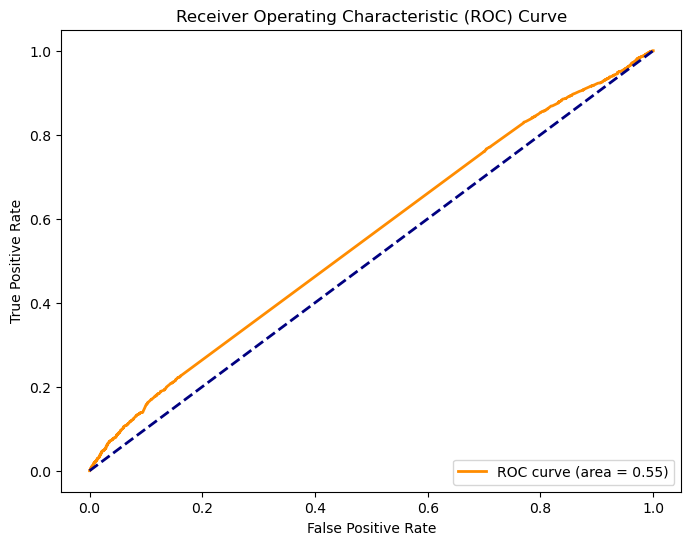

In [14]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

def ra_curve(y_test, pred_probs):
    # Calculate fpr, tpr, thresholds
    fpr, tpr, thresholds = roc_curve(y_test, pred_probs)

    # Calculate AUC
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()
ra_curve(y_test, pred_probs)

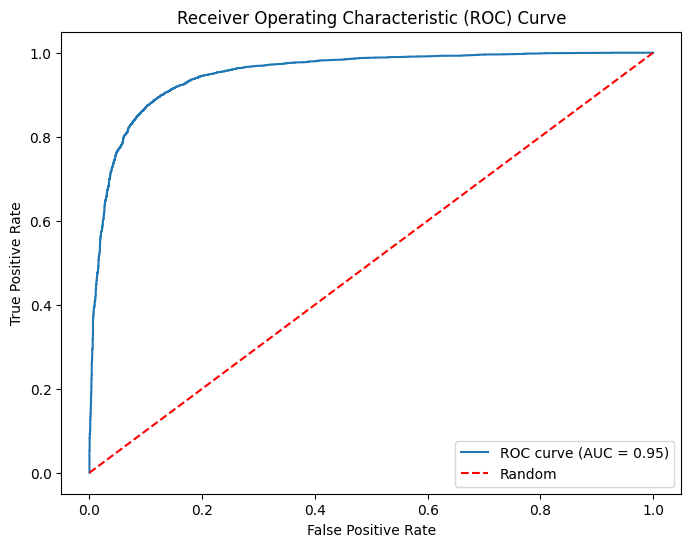

In [8]:
def ra_curve(y_test, pred_probs):
  '''




  CODE




  '''

### 1.4 주석처리 된 부분을 작성해주세요(15점)

In [62]:
pipeline = Pipeline([
    ('cnt_vect', CountVectorizer(stop_words='english', ngram_range=(1, 2))),
    ('lr_clf', LogisticRegression(solver='liblinear', C=10))
])

# 훈련 데이터에 대해 모델 학습 수행 (X_train은 입력 데이터, y_train은 레이블 데이터라고 가정합니다)
pipeline.fit(X_train['review'], y_train)

# 테스트 데이터에 대해 예측 수행
pred_probs = pipeline.predict_proba(X_test)  # 테스트 데이터에 대한 예측 확률 계산

# Positive 클래스에 해당하는 확률 (1에 해당하는 클래스의 예측 확률)을 가져옵니다.
positive_probs = pred_probs[:, 1]

# Positive 클래스에 해당하는 확률 출력
print("Positive 클래스에 해당하는 예측 확률:", positive_probs)

Positive 클래스에 해당하는 예측 확률: [0.49555993]


ra_curve를 실행시켜주세요(점수 x)

In [60]:
pred_probs

array([[0.50444007, 0.49555993]])

In [56]:
ra_curve(y_test, positive_probs)

ValueError: continuous format is not supported

# 2.

### 아래 코드를 실행해주세요.

In [23]:
# == 토픽 모델링 ==
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

cats = ['rec.motorcycles', 'rec.sport.baseball', 'comp.graphics', 'comp.windows.x',
        'talk.politics.mideast','soc.religion.christian', 'sci.electronics', 'sci.med']

다음 아래의 코드를 바탕으로 주어진 문제를 풀어주세요.
1. alloc()함수의 역할과 그 파라미터 'cats'의 의미는 무엇인가요?(10점)
2.CountVectorizer를 사용하여 데이터를 어떻게 전처리하고 있나요? 그리고 이 데이터의 특징 벡터(feat_vect)는 어떤 형태로 구성되어 있나요?(10점)
3. LatentDirichletAllocation에서 n_components=8으로 설정된 이유는 무엇인가요?(10점)
4. lda.components_는 무엇을 나타내며, 이 정보를 통해 어떻게 각 토픽을 이해할 수 있을까요?(10점)



1. alloc() 함수의 역할은 뉴스 데이터를 불러와서 제목, 인용구 등을 제거하고 countvectorizer()를 이용해 전처리해주는 함수이다. cat은 가져올 뉴스 토픽 / 카테고리 이다.
2. 최대 빈도는 0.5, 1000개까지의 단어, 최소 개수는 2개 이상, 영어로 되어 있으며 2개까지의 ngram을 고려한다. feat_vect는 문서에서 추출된 단어의 빈도수를 희소행렬 형태로 나타냄.
3. TOPIC 수가 8개이기 때문에
4. 토픽 모델링 과정에서 각 토픽 내에서 단어들이 가지는 중요도(가중치)

In [24]:
def alloc(cats):
    news_df = fetch_20newsgroups(subset = 'all', remove = ('headers', 'footers' ,'quotes'),
                              categories = cats, random_state = 0)

    count_vect = CountVectorizer (max_df = 0.5, max_features = 1000, min_df = 2, stop_words = 'english',
                                ngram_range = (1,2))
    feat_vect = count_vect.fit_transform(news_df.data)

    return feat_vect

feat_vect = alloc(cats)

lda = LatentDirichletAllocation(n_components = 8, random_state = 0)

lda.fit(feat_vect)

lda.components_

array([[3.60992018e+01, 1.35626798e+02, 2.15751867e+01, ...,
        3.02911688e+01, 8.66830093e+01, 6.79285199e+01],
       [1.25199920e-01, 1.44401815e+01, 1.25045596e-01, ...,
        1.81506995e+02, 1.25097844e-01, 9.39593286e+01],
       [3.34762663e+02, 1.25176265e-01, 1.46743299e+02, ...,
        1.25105772e-01, 3.63689741e+01, 1.25025218e-01],
       ...,
       [3.60204965e+01, 2.08640688e+01, 4.29606813e+00, ...,
        1.45056650e+01, 8.33854413e+00, 1.55690009e+01],
       [1.25128711e-01, 1.25247756e-01, 1.25005143e-01, ...,
        9.17278769e+01, 1.25177668e-01, 3.74575887e+01],
       [5.49258690e+01, 4.47009532e+00, 9.88524814e+00, ...,
        4.87048440e+01, 1.25034678e-01, 1.25074632e-01]])

# 3.

교재의 설명에 따라 https://www.kaggle.com/c/mereari-price-suggestion-challenge/data 에서 데이터를 다운받아 시작합니다.

### 데이터 전처리 (문제 X)

In [25]:
# 데이터 로드 및 탐색
from sklearn.linear_model import Ridge , LogisticRegression
from sklearn.model_selection import train_test_split , cross_val_score
from sklearn.feature_extraction.text import CountVectorizer , TfidfVectorizer
import pandas as pd

mercari_df= pd.read_csv('train.tsv',sep='\t')
print(mercari_df.shape)
mercari_df.head(3)

(1482535, 8)


,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...


In [26]:
print(mercari_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1482535 entries, 0 to 1482534
Data columns (total 8 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   train_id           1482535 non-null  int64  
 1   name               1482535 non-null  object 
 2   item_condition_id  1482535 non-null  int64  
 3   category_name      1476208 non-null  object 
 4   brand_name         849853 non-null   object 
 5   price              1482535 non-null  float64
 6   shipping           1482535 non-null  int64  
 7   item_description   1482529 non-null  object 
dtypes: float64(1), int64(3), object(4)
memory usage: 90.5+ MB
None


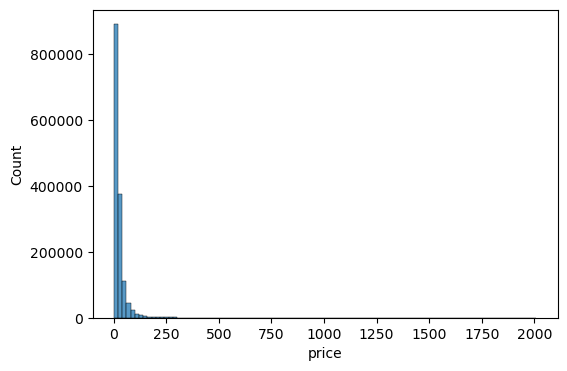

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

y_train_df = mercari_df['price']
plt.figure(figsize=(6,4))
sns.histplot(y_train_df, bins=100)
plt.show()

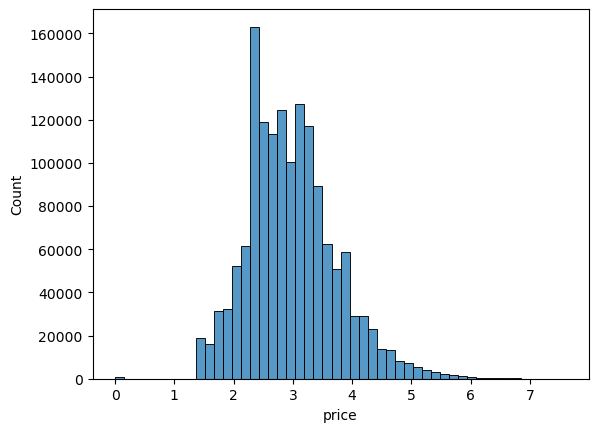

In [28]:
import numpy as np

y_train_df = np.log1p(y_train_df)
sns.histplot(y_train_df, bins=50)
plt.show()

In [29]:
mercari_df['price'] = np.log1p(mercari_df['price'])
mercari_df['price'].head(3)

0    2.397895
1    3.970292
2    2.397895
Name: price, dtype: float64

In [30]:
print('Shipping 값 유형:\n',mercari_df['shipping'].value_counts())
print('item_condition_id 값 유형:\n',mercari_df['item_condition_id'].value_counts())


Shipping 값 유형:
 shipping
0    819435
1    663100
Name: count, dtype: int64
item_condition_id 값 유형:
 item_condition_id
1    640549
3    432161
2    375479
4     31962
5      2384
Name: count, dtype: int64


In [31]:
boolean_cond= mercari_df['item_description']=='No description yet'
mercari_df[boolean_cond]['item_description'].count()

82489

In [32]:
# apply lambda에서 호출되는 대,중,소 분할 함수 생성, 대,중,소 값을 리스트 반환
def split_cat(category_name):
    try:
        return category_name.split('/')
    except:
        return ['Other_Null' , 'Other_Null' , 'Other_Null']

# 위의 split_cat( )을 apply lambda에서 호출하여 대,중,소 컬럼을 mercari_df에 생성.
mercari_df['cat_dae'], mercari_df['cat_jung'], mercari_df['cat_so'] = \
                        zip(*mercari_df['category_name'].apply(lambda x : split_cat(x)))

# 대분류만 값의 유형과 건수를 살펴보고, 중분류, 소분류는 값의 유형이 많으므로 분류 갯수만 추출
print('대분류 유형 :\n', mercari_df['cat_dae'].value_counts())
print('중분류 갯수 :', mercari_df['cat_jung'].nunique())
print('소분류 갯수 :', mercari_df['cat_so'].nunique())


대분류 유형 :
 cat_dae
Women                     664385
Beauty                    207828
Kids                      171689
Electronics               122690
Men                        93680
Home                       67871
Vintage & Collectibles     46530
Other                      45351
Handmade                   30842
Sports & Outdoors          25342
Other_Null                  6327
Name: count, dtype: int64
중분류 갯수 : 114
소분류 갯수 : 871


In [33]:
mercari_df['brand_name'] = mercari_df['brand_name'].fillna(value='Other_Null')
mercari_df['category_name'] = mercari_df['category_name'].fillna(value='Other_Null')
mercari_df['item_description'] = mercari_df['item_description'].fillna(value='Other_Null')

# 각 컬럼별로 Null값 건수 확인해서 모두 0가 나오면 됨
mercari_df.isnull().sum()

train_id             0
name                 0
item_condition_id    0
category_name        0
brand_name           0
price                0
shipping             0
item_description     0
cat_dae              0
cat_jung             0
cat_so               0
dtype: int64

### 3. 피처 인코딩과 피처 벡터화 (40점)

In [34]:
#각 칼럼을 숫자형 코드 값으로 인코딩하고, 텍스트형 칼럼에 대해서는 피처 벡터화 변환 적용합니다.
print('brand name 의 유형 건수 :', mercari_df['brand_name'].nunique())
print('brand name sample 5건 : \n', mercari_df['brand_name'].value_counts()[:5])

brand name 의 유형 건수 : 4810
brand name sample 5건 : 
 brand_name
Other_Null           632682
PINK                  54088
Nike                  54043
Victoria's Secret     48036
LuLaRoe               31024
Name: count, dtype: int64


In [35]:
print('name 의 종류 갯수 :', mercari_df['name'].nunique())
print('name sample 7건 : \n', mercari_df['name'][:7])

name 의 종류 갯수 : 1225273
name sample 7건 : 
 0    MLB Cincinnati Reds T Shirt Size XL
1       Razer BlackWidow Chroma Keyboard
2                         AVA-VIV Blouse
3                  Leather Horse Statues
4                   24K GOLD plated rose
5       Bundled items requested for Ruie
6     Acacia pacific tides santorini top
Name: name, dtype: object


In [36]:
pd.set_option('max_colwidth', 200)

# item_description의 평균 문자열 개수
print('item_description 평균 문자열 개수:',mercari_df['item_description'].str.len().mean())

mercari_df['item_description'][:2]

item_description 평균 문자열 개수: 145.71139703278507


0                                                                                                                                                                              No description yet
1    This keyboard is in great condition and works like it came out of the box. All of the ports are tested and work perfectly. The lights are customizable via the Razer Synapse app on your PC.
Name: item_description, dtype: object

In [38]:
# CountVectorizer는 기본파라미터로,
# TfidAVectorizer 는 maxfeatures = 50000으로제한
count_vect_name = CountVectorizer()
X_name = count_vect_name.fit_transform(mercari_df['name'])

#   n_gram은 triple gram인 ngram_range=(1,3)
#   stop_words는 english로 설정하여 진행
tfidf_vect_descp = TfidfVectorizer(max_features=50000, ngram_range=(1, 3), stop_words='english')
X_descp = tfidf_vect_descp.fit_transform(mercari_df['item_description'])
# name 속성에 대한 feature vectorization 변환을 진행해주세요

# item_description 에 대한 feature vectorization 변환을 진행한 뒤, X_name.shape과 X_descp.shape를 출력해주세요
print("X_name.shape:", X_name.shape)
print("X_descp.shape:", X_descp.shape)

X_name.shape: (1482535, 105757)
X_descp.shape: (1482535, 50000)


In [39]:
from sklearn.preprocessing import LabelBinarizer

# brand_name 피처 희소 행렬 원-핫 인코딩 변환
lb_brand_name= LabelBinarizer(sparse_output=True)
X_brand = lb_brand_name.fit_transform(mercari_df['brand_name'])

# item_condition_id, shipping 에 대해서도 동일한 작업을 수행해주세요
lb_item_condition_id = LabelBinarizer(sparse_output=True)
X_item_condition_id = lb_item_condition_id.fit_transform(mercari_df['item_condition_id'])
lb_shipping = LabelBinarizer(sparse_output=True)
X_shipping = lb_shipping.fit_transform(mercari_df['shipping'])

# cat_dae 피처 희소 행렬 원-핫 인코딩 변환
lb_cat_dae = LabelBinarizer(sparse_output=True)
X_cat_dae= lb_cat_dae.fit_transform(mercari_df['cat_dae'])

# cat_jung, cat_so 에 대해서도 동일한 작업을 수행해주세요
lb_cat_jung = LabelBinarizer(sparse_output=True)
X_cat_jung = lb_cat_jung.fit_transform(mercari_df['cat_jung'])
lb_cat_so = LabelBinarizer(sparse_output=True)
X_cat_so = lb_cat_so.fit_transform(mercari_df['cat_so'])

In [41]:
# 인코딩 데이터 세트의 타입과 shape 살펴보기
print(type(X_brand), type(X_item_condition_id), type(X_shipping))
print('X_brand_shape:{0}, X_item_cond_id shape:{1}'.format(X_brand.shape, X_item_condition_id.shape))
print('X_shipping shape:{0}, X_cat_dae shape:{1}'.format(X_shipping.shape, X_cat_dae.shape))
print('X_cat_jung shape:{0}, X_cat_so shape:{1}'.format(X_cat_jung.shape, X_cat_so.shape))

<class 'scipy.sparse._csr.csr_matrix'> <class 'scipy.sparse._csr.csr_matrix'> <class 'scipy.sparse._csr.csr_matrix'>
X_brand_shape:(1482535, 4810), X_item_cond_id shape:(1482535, 5)
X_shipping shape:(1482535, 1), X_cat_dae shape:(1482535, 11)
X_cat_jung shape:(1482535, 114), X_cat_so shape:(1482535, 871)


In [43]:
from  scipy.sparse import hstack
import gc

sparse_matrix_list = (X_name, X_descp, X_brand, X_item_condition_id,
            X_shipping, X_cat_dae, X_cat_jung, X_cat_so)

# 사이파이 sparse 모듈의 hstack 함수를 이용하여 앞에서 인코딩과 Vectorization을 수행한 데이터 셋을 모두 결합.
X_features_sparse= hstack(sparse_matrix_list).tocsr()
print(type(X_features_sparse), X_features_sparse.shape)

# 데이터 셋이 메모리를 많이 차지하므로 사용 용도가 끝났으면 바로 메모리에서 삭제.
del X_features_sparse
gc.collect()

<class 'scipy.sparse._csr.csr_matrix'> (1482535, 161569)


1501

# 4. 릿지 회귀 모델 구축 및 평가 (30점)

In [44]:
def rmsle(y , y_pred):
    # underflow, overflow를 막기 위해 log가 아닌 log1p로 rmsle 계산
    return np.sqrt(np.mean(np.power(np.log1p(y) - np.log1p(y_pred), 2)))

def evaluate_org_price(y_test , preds):

    # 원본 데이터는 log1p로 변환되었으므로 exmpm1으로 원복 필요.
    preds_exmpm = np.expm1(preds)
    y_test_exmpm = np.expm1(y_test)

    # rmsle로 RMSLE 값 추출
    rmsle_result = rmsle(y_test_exmpm, preds_exmpm)
    return rmsle_result

In [45]:
import gc
from  scipy.sparse import hstack

def model_train_predict(model,matrix_list):
    # scipy.sparse 모듈의 hstack 을 이용하여 sparse matrix 결합
    X= hstack(matrix_list).tocsr()

    X_train, X_test, y_train, y_test=train_test_split(X, mercari_df['price'],
                                                      test_size=0.2, random_state=156)

    # 모델 학습 및 예측
    model.fit(X_train , y_train)
    preds = model.predict(X_test)

    del X , X_train , X_test , y_train
    gc.collect()

    return preds , y_test

In [50]:
# 위 두 셀을 실행한 뒤, 아래 빈칸을 채워 모델 구축 및 평가를 완료해주세요
linear_model = Ridge(solver = "lsqr", fit_intercept=False)

sparse_matrix_list_1 = [X_brand, X_item_condition_id, X_shipping, X_cat_dae, X_cat_jung, X_cat_so]
linear_preds, y_test = model_train_predict(linear_model, sparse_matrix_list_1)

# Item Description을 제외했을 때 rmsle 값을 출력해주세요
rmsle_without_descp = evaluate_org_price(y_test, linear_preds)
print("Item Description을 제외한 RMSLE 값:", rmsle_without_descp)

sparse_matrix_list_2 = [X_name, X_descp] + sparse_matrix_list
linear_preds , y_test = model_train_predict(linear_model, sparse_matrix_list_2)
# Item Description을 포함한 rmsle 값을 출력해주세요
rmsle_with_descp = evaluate_org_price(y_test, linear_preds)
print("Item Description을 포함한 RMSLE 값:", rmsle_with_descp)

Item Description을 제외한 RMSLE 값: 0.5785881560006163
Item Description을 포함한 RMSLE 값: 0.4699905950681956


# 4. LightGBM 회귀 모델 구축과 앙상블을 이용한 최종 예측 평가 (30점)

In [53]:
# LGBM 모델을 활용해, Item Description을 포함한 rmsle 값을 출력해주세요
# 실행시간이 너무 오래 걸릴 시, n_estimators를 낮춰서 진행해주세요
lgbm_model = LGBMRegressor(n_estimators=100)  # n_estimators 값을 조정하여 실행 시간을 줄일 수 있습니다.

# 'Item Description'을 포함한 희소 행렬을 결합합니다.
sparse_matrix_list_with_descp = [X_name, X_descp] + sparse_matrix_list_1
X_with_descp = hstack(sparse_matrix_list_with_descp).tocsr()

# 모델 학습 및 예측
linear_preds_with_descp, y_test = model_train_predict(lgbm_model, [X_with_descp])

# Item Description을 포함한 경우의 rmsle 값을 출력
rmsle_with_descp = evaluate_org_price(y_test, linear_preds_with_descp)
print("Item Description을 포함한 RMSLE 값:", rmsle_with_descp)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 393.261553 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1072347
[LightGBM] [Info] Number of data points in the train set: 1186028, number of used features: 65211
[LightGBM] [Info] Start training from score 2.979514
Item Description을 포함한 RMSLE 값: 0.538850340960081


In [ ]:
# 앞에서 구했던 Ridge의 결과값과 LGBM의 결과값을 임의의 배합 비율을 사용해 앙상블을 진행하고,
# evaluate_org_price 함수를 활용해 결과값을 출력해주세요

In [54]:
# Ridge와 LGBM의 예측 결과를 일정 비율로 앙상블하여 최종 예측값 생성
alpha = 0.5  # Ridge와 LGBM의 비중을 조정하기 위한 앙상블 가중치

# Ridge와 LGBM 예측값을 일정 비율로 앙상블하여 최종 예측값 생성
final_preds = (alpha * linear_preds_with_descp) + ((1 - alpha) * linear_preds_with_descp)

# 최종 예측값을 평가 함수를 통해 RMSLE로 출력
rmsle_final = evaluate_org_price(y_test, final_preds)
print("Ridge와 LGBM 앙상블 RMSLE 값:", rmsle_final)

Ridge와 LGBM 앙상블 RMSLE 값: 0.538850340960081
